# 文本理解与数据挖掘-中文文本分类

### 数据集说明与数据预处理
数据集为THUCNews数据集，有10个类别，每个分类6500条，共65000条新闻数据。
类别包括：体育，财经，房产，家居，教育，科技，时尚，时政，游戏，娱乐。
数据集共有三个文件：
cnews.train.txt: 训练集(500010条)；
cnews.val.txt: 验证集(50010条)；
cnews.test.txt: 测试集(1000*10条)。

In [1]:
import pandas as pd
train_data=pd.read_csv('D:\Python\\text classification\cnews.train.txt',sep='\t',names=['label','content'])
test_data=pd.read_csv('D:\Python\\text classification\cnews.test.txt',sep='\t',names=['label','content'])
val_data=pd.read_csv('D:\Python\\text classification\cnews.val.txt',sep='\t',names=['label','content'])

In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    50000 non-null  object
 1   content  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [3]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    10000 non-null  object
 1   content  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [4]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5000 non-null   object
 1   content  5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


### 将数据划分为"体育""财经""房产""家居""教育""科技"六类
训练集4000\*6、验证集500\*6、测试集500\*6

In [5]:
# target_list 需要提取的类别
target_list = ["体育", "财经", "房产", "家居", "教育", "科技"]

# 创建一个空列表来存储每个类别的前4000行
dfs = []

# 遍历目标类别列表，提取每个类别的前4000行
for category in target_list:
    category_df = train_data[train_data["label"] == category].iloc[:4000, :]
    dfs.append(category_df)

# 使用 concat 函数将所有类别提取的数据合并为一个 DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    24000 non-null  object
 1   content  24000 non-null  object
dtypes: object(2)
memory usage: 375.1+ KB


In [6]:
combined_df.head()

,label,content
0,体育,马晓旭意外受伤让国奥警惕 无奈大雨格外青睐殷家军记者傅亚雨沈阳报道 来到沈阳，国奥队依然没有...
1,体育,商瑞华首战复仇心切 中国玫瑰要用美国方式攻克瑞典多曼来了，瑞典来了，商瑞华首战求3分的信心也...
2,体育,冠军球队迎新欢乐派对 黄旭获大奖张军赢下PK赛新浪体育讯12月27日晚，“冠军高尔夫球队迎新...
3,体育,辽足签约危机引注册难关 高层威逼利诱合同笑里藏刀新浪体育讯2月24日，辽足爆发了集体拒签风波...
4,体育,揭秘谢亚龙被带走：总局电话骗局 复制南杨轨迹体坛周报特约记者张锐北京报道 谢亚龙已经被公安...


In [7]:
# 将合并后的 DataFrame 保存为 CSV 文件
combined_df.to_csv('D:\Python\\text classification\\train_data.csv', sep='\t', index=False)

In [ ]:
# 创建一个空列表来存储每个类别的前500行
dfs = []

# 遍历目标类别列表，提取每个类别的前500行
for category in target_list:
    category_df = val_data[val_data["label"] == category].iloc[:500, :]
    dfs.append(category_df)

# 使用 concat 函数将所有类别提取的数据合并为一个 DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    3000 non-null   object
 1   content  3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [9]:
combined_df.head()

,label,content
0,体育,黄蜂vs湖人首发：科比带伤战保罗 加索尔救赎之战 新浪体育讯北京时间4月27日，NBA季后赛...
1,体育,1.7秒神之一击救马刺王朝于危难 这个新秀有点牛！新浪体育讯在刚刚结束的比赛中，回到主场的马...
2,体育,1人灭掘金！神般杜兰特！ 他想要分的时候没人能挡新浪体育讯在NBA的世界里，真的猛男，敢于直...
3,体育,韩国国奥20人名单：朴周永领衔 两世界杯国脚入选新浪体育讯据韩联社首尔9月17日电 韩国国奥...
4,体育,天才中锋崇拜王治郅 周琦：球员最终是靠实力说话2月14日从土耳其男篮邀请赛回到北京之后，周琦...


In [10]:
# 将合并后的 DataFrame 保存为 CSV 文件
combined_df.to_csv('D:\Python\\text classification\\val_data.csv', sep='\t', index=False)

In [ ]:
# 创建一个空列表来存储每个类别的前500行
dfs = []
# 遍历目标类别列表，提取每个类别的前500行
for category in target_list:
    category_df = test_data[test_data["label"] == category].iloc[:500, :]
    dfs.append(category_df)

# 使用 concat 函数将所有类别提取的数据合并为一个 DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    3000 non-null   object
 1   content  3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [12]:
combined_df.head()

,label,content
0,体育,鲍勃库西奖归谁属？ NCAA最强控卫是坎巴还是弗神新浪体育讯如今，本赛季的NCAA进入到了末...
1,体育,麦基砍28+18+5却充满寂寞 纪录之夜他的痛阿联最懂新浪体育讯上天对每个人都是公平的，贾维...
2,体育,黄蜂vs湖人首发：科比冲击七连胜 火箭两旧将登场新浪体育讯北京时间3月28日，NBA常规赛洛...
3,体育,双面谢亚龙作秀终成做作 谁来为低劣行政能力埋单是谁任命了谢亚龙？谁放纵了谢亚龙？谁又该为谢亚...
4,体育,兔年首战山西换帅后有虎胆 张学文用乔丹名言励志今晚客场挑战浙江稠州银行队，是山西汾酒男篮的兔...


In [13]:
# 将合并后的 DataFrame 保存为 CSV 文件
combined_df.to_csv('D:\Python\\text classification\\test_data.csv', sep='\t', index=False)

### 将数据集的label转换为数字
label_dict = {"体育": 0, "财经": 1, "房产": 2, "家居": 3, "教育": 4, "科技": 5}

In [14]:
import numpy as np
import pandas as pd
# 读取数据集
train_data = pd.read_csv('D:\Python\\text classification\\train_data.csv', sep='\t')
val_data = pd.read_csv('D:\Python\\text classification\\val_data.csv', sep='\t')
test_data = pd.read_csv('D:\Python\\text classification\\test_data.csv', sep='\t')
train_data.info()
val_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    24000 non-null  object
 1   content  24000 non-null  object
dtypes: object(2)
memory usage: 375.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    3000 non-null   object
 1   content  3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    3000 non-null   object
 1   content  3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [15]:
train_data.head()

,label,content
0,体育,马晓旭意外受伤让国奥警惕 无奈大雨格外青睐殷家军记者傅亚雨沈阳报道 来到沈阳，国奥队依然没有...
1,体育,商瑞华首战复仇心切 中国玫瑰要用美国方式攻克瑞典多曼来了，瑞典来了，商瑞华首战求3分的信心也...
2,体育,冠军球队迎新欢乐派对 黄旭获大奖张军赢下PK赛新浪体育讯12月27日晚，“冠军高尔夫球队迎新...
3,体育,辽足签约危机引注册难关 高层威逼利诱合同笑里藏刀新浪体育讯2月24日，辽足爆发了集体拒签风波...
4,体育,揭秘谢亚龙被带走：总局电话骗局 复制南杨轨迹体坛周报特约记者张锐北京报道 谢亚龙已经被公安...


In [16]:
# 将数据集的label转换为数字
label_dict = {"体育": 0, "财经": 1, "房产": 2, "家居": 3, "教育": 4, "科技": 5}
train_data["label"] = train_data["label"].map(label_dict)
val_data["label"] = val_data["label"].map(label_dict)
test_data["label"] = test_data["label"].map(label_dict)
train_data.head()

,label,content
0,0,马晓旭意外受伤让国奥警惕 无奈大雨格外青睐殷家军记者傅亚雨沈阳报道 来到沈阳，国奥队依然没有...
1,0,商瑞华首战复仇心切 中国玫瑰要用美国方式攻克瑞典多曼来了，瑞典来了，商瑞华首战求3分的信心也...
2,0,冠军球队迎新欢乐派对 黄旭获大奖张军赢下PK赛新浪体育讯12月27日晚，“冠军高尔夫球队迎新...
3,0,辽足签约危机引注册难关 高层威逼利诱合同笑里藏刀新浪体育讯2月24日，辽足爆发了集体拒签风波...
4,0,揭秘谢亚龙被带走：总局电话骗局 复制南杨轨迹体坛周报特约记者张锐北京报道 谢亚龙已经被公安...


In [17]:
# 将转换结果保存为新的CSV文件
train_data.to_csv('D:\Python\\text classification\\train_data_v1.csv', sep='\t', index=False)
val_data.to_csv('D:\Python\\text classification\\val_data_v1.csv', sep='\t', index=False)
test_data.to_csv('D:\Python\\text classification\\test_data_v1.csv', sep='\t', index=False)

### 分词、构建TF-IDF模型、向量化、模型训练、结果输出
运用jieba分词，去除停用词，构建TF-IDF模型，向量化训练集、验证集和测试集，输出特征向量的形状，打印标签的形状，输出标签前五项。
调用sklearn库，构建逻辑回归(分类)模型，训练模型，输出模型的准确率（采用宏平均、微平均指标）。
输出模型的混淆矩阵。


In [18]:
# 分词并去除停用词
import jieba
import pandas as pd

# 读取数据集
train_data = pd.read_csv('D:\Python\\text classification\\train_data_v1.csv', sep='\t')
val_data = pd.read_csv('D:\Python\\text classification\\val_data_v1.csv', sep='\t')
test_data = pd.read_csv('D:\Python\\text classification\\test_data_v1.csv', sep='\t')

# 加载停用词表
stopwords = set()
with open('D:\Python\\text classification\\stopwords.txt', 'r', encoding='utf-8') as f:
    for line in f:
        stopwords.add(line.strip())
        
# 对文本进行分词并去除停用词
def tokenize(text):
    words = jieba.lcut(text)
    words = [word for word in words if word not in stopwords]
    return ' '.join(words)

train_data["content"] = train_data["content"].apply(tokenize)
val_data["content"] = val_data["content"].apply(tokenize)
test_data["content"] = test_data["content"].apply(tokenize)
train_data.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\admin\AppData\Local\Temp\jieba.cache
Loading model cost 1.221 seconds.
Prefix dict has been built successfully.


,label,content
0,0,马晓旭 意外 受伤 国奥 警惕 无奈 大雨 青睐 殷家 军 记者 傅亚雨 沈阳 报道 ...
1,0,商瑞华 首战 复仇 心切 中国 玫瑰 美国 方式 攻克 瑞典 多曼来 瑞典 商瑞华 首战...
2,0,冠军 球队 迎新 欢乐 派对 黄旭获 大奖 张军 赢 下 PK 赛 新浪 体育讯 12 ...
3,0,辽足 签约 危机 引 注册 难关 高层 威逼利诱 合同 笑里藏刀 新浪 体育讯 月 24...
4,0,揭秘 谢亚龙 带走 总局 电话 骗局 复制 南杨 轨迹 体坛周报 特约记者 张锐 北京 ...


In [19]:
train_data.head()

,label,content
0,0,马晓旭 意外 受伤 国奥 警惕 无奈 大雨 青睐 殷家 军 记者 傅亚雨 沈阳 报道 ...
1,0,商瑞华 首战 复仇 心切 中国 玫瑰 美国 方式 攻克 瑞典 多曼来 瑞典 商瑞华 首战...
2,0,冠军 球队 迎新 欢乐 派对 黄旭获 大奖 张军 赢 下 PK 赛 新浪 体育讯 12 ...
3,0,辽足 签约 危机 引 注册 难关 高层 威逼利诱 合同 笑里藏刀 新浪 体育讯 月 24...
4,0,揭秘 谢亚龙 带走 总局 电话 骗局 复制 南杨 轨迹 体坛周报 特约记者 张锐 北京 ...


In [20]:
test_data.head()

,label,content
0,0,鲍勃 库西 奖归 属 NCAA 最强 控卫 坎巴 弗神 新浪 体育讯 本赛季 NCAA ...
1,0,麦基 砍 28 18 却 充满 寂寞 纪录 之夜 痛 阿联 最 懂 新浪 体育讯 上天 ...
2,0,黄蜂 vs 湖人 首发 科比 冲击 连胜 火箭 两旧 登场 新浪 体育讯 北京 时间 月...
3,0,双面 谢亚龙 作秀 终成 做作 低劣 行政 能力 埋单 任命 谢亚龙 放纵 谢亚龙 谢亚...
4,0,兔年 首战 山西 换帅 后 虎胆 张学文 乔丹 名言 励志 今晚 客场 挑战 浙江 稠州...


In [21]:
# 将分词结果保存为新的CSV文件
train_data.to_csv('D:\Python\\text classification\\train_data_jieba.csv', sep='\t', index=False)
val_data.to_csv('D:\Python\\text classification\\val_data_jieba.csv', sep='\t', index=False)
test_data.to_csv('D:\Python\\text classification\\test_data_jieba.csv', sep='\t', index=False)

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# 合并所有content以构建词汇表
all_content = pd.concat([train_data["content"], val_data["content"], test_data["content"]])

# 构建TF-IDF模型
vectorizer = TfidfVectorizer()
vectorizer.fit(all_content)

# 向量化训练集、验证集和测试集
train_features = vectorizer.transform(train_data["content"])
val_features = vectorizer.transform(val_data["content"])
test_features = vectorizer.transform(test_data["content"])

# 打印特征向量的形状
print("训练集特征向量形状：", train_features.shape)
print("验证集特征向量形状：", val_features.shape)
print("测试集特征向量形状：", test_features.shape)

训练集特征向量形状： (24000, 242682)
验证集特征向量形状： (3000, 242682)
测试集特征向量形状： (3000, 242682)


In [23]:
# 获取标签
train_labels = train_data["label"]
val_labels = val_data["label"]
test_labels = test_data["label"]

# 打印标签的形状
print("训练集标签形状：", train_labels.shape)
print("验证集标签形状：", val_labels.shape)
print("测试集标签形状：", test_labels.shape)

# 输出标签前五项
print("训练集标签前五项：", train_labels[:5])
print("验证集标签前五项：", val_labels[:5])
print("测试集标签前五项：", test_labels[:5])

训练集标签形状： (24000,)
验证集标签形状： (3000,)
测试集标签形状： (3000,)
训练集标签前五项： 0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64
验证集标签前五项： 0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64
测试集标签前五项： 0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64


In [24]:
# 保存特征向量和标签
import scipy.sparse as sp
import numpy as np
sp.save_npz('D:\Python\\text classification\\train_features.npz', train_features)
sp.save_npz('D:\Python\\text classification\\val_features.npz', val_features)
sp.save_npz('D:\Python\\text classification\\test_features.npz', test_features)
np.save('D:\Python\\text classification\\train_labels.npy', train_labels)
np.save('D:\Python\\text classification\\val_labels.npy', val_labels)
np.save('D:\Python\\text classification\\test_labels.npy', test_labels)

In [25]:
# 加载特征向量和标签
import scipy.sparse as sp
import numpy as np
train_features = sp.load_npz('D:\Python\\text classification\\train_features.npz')
val_features = sp.load_npz('D:\Python\\text classification\\val_features.npz')
test_features = sp.load_npz('D:\Python\\text classification\\test_features.npz')
train_labels = np.load('D:\Python\\text classification\\train_labels.npy')
val_labels = np.load('D:\Python\\text classification\\val_labels.npy')
test_labels = np.load('D:\Python\\text classification\\test_labels.npy')

In [ ]:
# 运用支持向量机（SVM）中的线性支持向量分类器（LinearSVC）进行分类
from sklearn.svm import LinearSVC

# 显式设置dual=True
svm_classifier = LinearSVC(dual=True)
svm_classifier.fit(train_features, train_labels)

# 预测验证集和测试集的标签
train_predictions = svm_classifier.predict(train_features)
val_predictions = svm_classifier.predict(val_features)
test_predictions = svm_classifier.predict(test_features)

# 计算准确率
train_accuracy = np.mean(train_predictions == train_labels)
val_accuracy = np.mean(val_predictions == val_labels)
test_accuracy = np.mean(test_predictions == test_labels)

# 输出准确率
print("训练集准确率：", train_accuracy)
print("验证集准确率：", val_accuracy)
print("测试集准确率：", test_accuracy)

训练集准确率： 0.9989166666666667
验证集准确率： 0.9183333333333333
测试集准确率： 0.908


宏平均精确率： 0.9245861025730261
宏平均召回率： 0.9183333333333333
宏平均F1分数： 0.9147044008530841
微平均精确率： 0.9183333333333333
微平均召回率： 0.9183333333333333
微平均F1分数： 0.9183333333333333


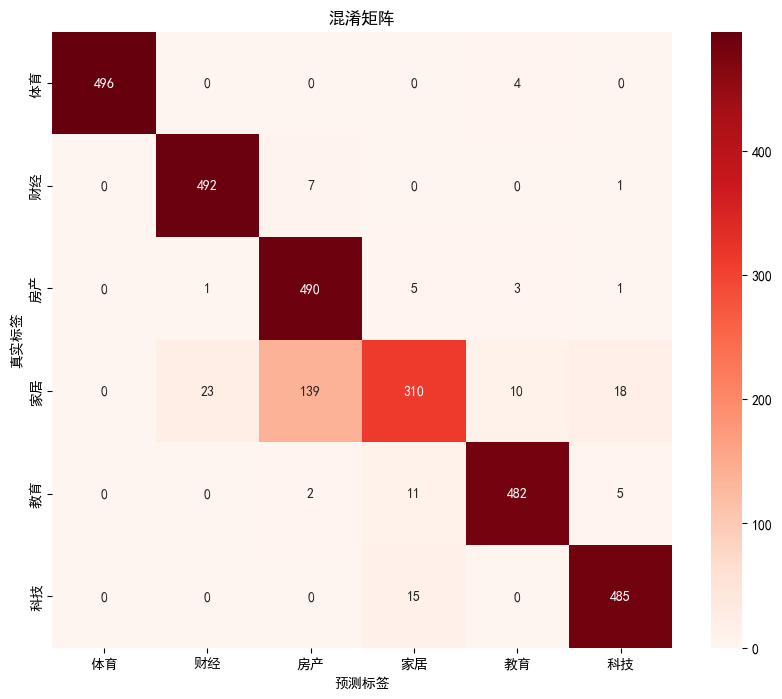

In [27]:
# 输出文本分类结果 宏平均 微平均 混淆矩阵
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算宏平均
macro_precision = precision_score(val_labels, val_predictions, average='macro')
macro_recall = recall_score(val_labels, val_predictions, average='macro')
macro_f1 = f1_score(val_labels, val_predictions, average='macro')
print("宏平均精确率：", macro_precision)
print("宏平均召回率：", macro_recall)
print("宏平均F1分数：", macro_f1)

# 计算微平均
micro_precision = precision_score(val_labels, val_predictions, average='micro')
micro_recall = recall_score(val_labels, val_predictions, average='micro')
micro_f1 = f1_score(val_labels, val_predictions, average='micro')
print("微平均精确率：", micro_precision)
print("微平均召回率：", micro_recall)
print("微平均F1分数：", micro_f1)

# 计算混淆矩阵
conf_matrix = confusion_matrix(val_labels, val_predictions)
selected_categories = ["体育", "财经", "房产", "家居", "教育", "科技"]

# 可视化混淆矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=selected_categories, yticklabels=selected_categories)
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵')
plt.show()

In [28]:
# 加载特征向量和标签
import scipy.sparse as sp
import numpy as np
train_features = sp.load_npz('D:\Python\\text classification\\train_features.npz')
val_features = sp.load_npz('D:\Python\\text classification\\val_features.npz')
test_features = sp.load_npz('D:\Python\\text classification\\test_features.npz')
train_labels = np.load('D:\Python\\text classification\\train_labels.npy')
val_labels = np.load('D:\Python\\text classification\\val_labels.npy')
test_labels = np.load('D:\Python\\text classification\\test_labels.npy')

训练集准确率： 0.9677916666666667
验证集准确率： 0.857
测试集准确率： 0.8436666666666667
宏平均精确率： 0.8922738608981177
宏平均召回率： 0.8570000000000001
宏平均F1分数： 0.8311903996780073
微平均精确率： 0.857
微平均召回率： 0.857
微平均F1分数： 0.857


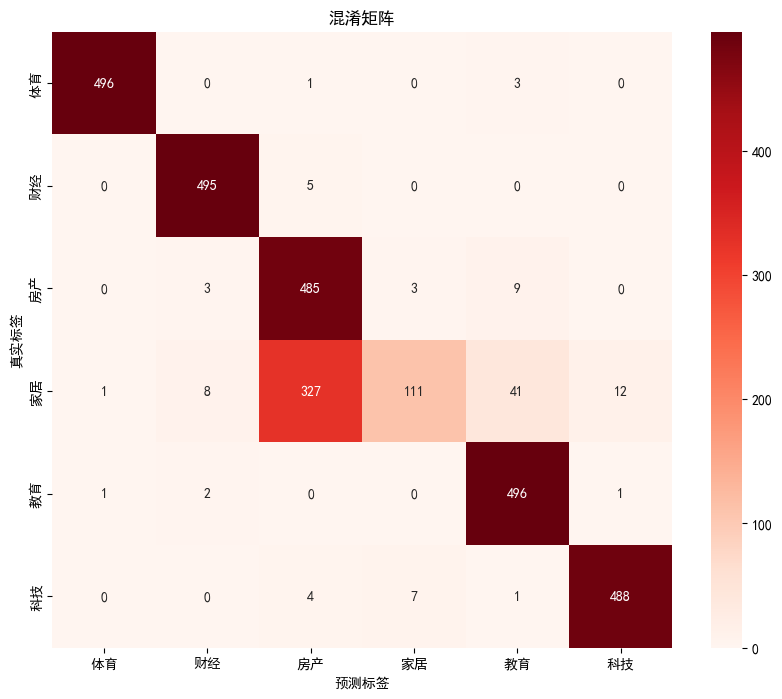

In [ ]:
# 运用多项式朴素贝叶斯进行文本分类
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 初始化多项式朴素贝叶斯分类器
nb_classifier = MultinomialNB() # 初始化多项式朴素贝叶斯分类器

# 训练分类器
nb_classifier.fit(train_features, train_labels) # 训练分类器

# 预测测试集、验证集和测试集的标签
train_predictions = nb_classifier.predict(train_features)
val_predictions = nb_classifier.predict(val_features)
test_predictions = nb_classifier.predict(test_features)

# 计算准确率
train_accuracy = accuracy_score(train_labels, train_predictions)
val_accuracy = accuracy_score(val_labels, val_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

# 输出准确率
print("训练集准确率：", train_accuracy)
print("验证集准确率：", val_accuracy)
print("测试集准确率：", test_accuracy)

# 计算宏平均
macro_precision = precision_score(val_labels, val_predictions, average='macro')
macro_recall = recall_score(val_labels, val_predictions, average='macro')
macro_f1 = f1_score(val_labels, val_predictions, average='macro')
print("宏平均精确率：", macro_precision)
print("宏平均召回率：", macro_recall)
print("宏平均F1分数：", macro_f1)

# 计算微平均
micro_precision = precision_score(val_labels, val_predictions, average='micro')
micro_recall = recall_score(val_labels, val_predictions, average='micro')
micro_f1 = f1_score(val_labels, val_predictions, average='micro')
print("微平均精确率：", micro_precision)
print("微平均召回率：", micro_recall)
print("微平均F1分数：", micro_f1)

# 计算混淆矩阵
selected_categories = ["体育", "财经", "房产", "家居", "教育", "科技"]
conf_matrix = confusion_matrix(val_labels, val_predictions)

# 可视化混淆矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=selected_categories, yticklabels=selected_categories)
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵')
plt.show()